<a href="https://colab.research.google.com/github/sitiaisyah14/Machine-Learning_2022/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK**

1. Deatrisya Mirela Harahap | 2041720013
2. Siti Aisyah | 2041720061 

# **Penyelesaian UAS**
1. Preprocessing Data
2. Clustering
3. Labeling
4. Classification 
5. Prediction
6. Evaluasi.

In [ ]:
#Perintah untuk melakukan import file dengan library google.colab dari directory komputer

from google.colab import files
uploaded = files.upload()

Saving tweet_emotions.csv to tweet_emotions.csv


In [ ]:
#Memanggil dan menampilkan hasil file yang telah diimport dan membaca dataset

import numpy as np
import pandas as pd

data_tweet = pd.read_csv('tweet_emotions.csv')

data_tweet.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [ ]:
# Mengecek data apakah ada yang kosong
# Jika terdapat yang kosong maka dilakukan pengembalian jumlah nilai yang kosong dalam kumpulan data.
data_tweet.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

# **Tahap 1 : Preprocessing Data**

Dalam preprocessing data terdapat beberapa tahap antara lain

*   **Case Folding** : Melakukan proses case folding dengan fungsi lower() pada class Series.str library Pandas
*   **Tokenizing** : Proses number removal, whitecase removal, puntuation removal dan word_tokenize() untuk memecah string kedalam tokens. Pandas Dataframe atau Series mampu menjalankan function external untuk di terapkan pada kolom atau baris dengan menggunakan fungsi .apply()
*   **Filtering (Stopword Removal)** : Menggunakan library NLTK untuk filtering terhadap Dataframe dengan bahasa english. Menambahkan list stopword dengan menggunakan fungsi .extend() terhadap list_stopword , penggunaan fungsi .set() bermanfaat untuk membuat iterable list menjadi sequence iterable element. Hasilnya kita dapat mempercepat proses pengecekan apakan sebuah token terdapat pada list_stopword atau tidak (if token not in list_stopword
*   **Stemming**: Normalization digunakan untuk menyeragamkan term yang memiliki makna sama namun penulisanya berbeda, bisa diakibatkan kesalahan penulisan, penyingkatan kata, ataupun “bahasa gaul”.





## Proses Case Folding, Tokenizing dan Filtering oleh *Library Preprocessor*

In [ ]:
!pip install tweet-preprocessor
import preprocessor as p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def preprocessing_data(x):
  return p.clean(x)

def tokenize_data(x):
  return p.tokenize(x)

data_tweet['tweet_clean'] = data_tweet['content'].apply(preprocessing_data)
data_tweet['tweet_clean'] = data_tweet['tweet_clean'].apply(tokenize_data)
data = data_tweet.drop_duplicates()

## Proses Stemming dari library PorterStemmer

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer() 

def stemming_data(x):
   return ps.stem(x)

data['tweet_clean'] = data['tweet_clean'].apply(stemming_data)

# **Tahap 2 : Clustering**

Pengelompokan data ke dalam beberapa kategori atau cluster, yaitu
komentar positif, netral, dan negatif.

In [ ]:
!pip install textblob      #for installation

import textblob            #to import
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import TextBlog Package
from textblob import TextBlob

# Membuat fungsi untuk menghitung polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

data['polarity'] = data['tweet_clean'].apply(get_polarity)


def condition(c):
    if c > 0:
        return "Positif"
    elif c == 0:
        return "Netral"
    else:
        return 'Negatif'


data['clustering'] = data['polarity'].apply(condition)


## Dilakukan Pencetakan dari hasil clustering komentar positif, netral, dan negatif setiap baris data

In [ ]:
data.head(10)

,tweet_id,sentiment,content,tweet_clean,polarity,clustering
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier and...,-0.350000,Negatif
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin on...,0.000000,Netral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,0.000000,Netral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!,0.250000,Positif
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston ...,0.000000,Netral
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,re-pinging : why didn't you go to prom? bc my ...,0.000000,Netral
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...","i should be sleep, but im not! thinking about ...",0.220833,Positif
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,hmmm. is down,-0.155556,Negatif
8,1956969035,sadness,@charviray Charlene my love. I miss you,charlene my love. i miss y,0.500000,Positif
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,i'm sorry at least it's friday?,-0.400000,Negatif


# **Tahap 3 : Labeling**

Label merupakan hasil dari pengelompokan melalui clustering

## Labeling Hasil Kategori Clustering 

In [ ]:
# Encode Label pada Sentiment
new_labels = {
    'Positif': 1,
    'Netral': 0,
    'Negatif': -1,
}


data["clustering_score"] = data['clustering'].map(new_labels)

data

,tweet_id,sentiment,content,tweet_clean,polarity,clustering,clustering_score
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier and...,-0.350000,Negatif,-1
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh...waitin on...,0.000000,Netral,0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral ceremony...gloomy friday...,0.000000,Netral,0
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon!,0.250000,Positif,1
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston ...,0.000000,Netral,0
...,...,...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,,0.000000,Netral,0
39996,1753919001,love,Happy Mothers Day All my love,happy mothers day all my lov,0.800000,Positif,1
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,happy mother's day to all the mommies out ther...,0.368750,Positif,1
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,wassup beautiful!!! follow me!! peep out my ne...,0.606534,Positif,1


## Labeling variabel X

In [ ]:
# Mengimport fitur TF-IDF untuk melakukan pembobotan
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data["tweet_clean"])
X.shape

(40000, 30119)

## Labeling variabel Y

In [ ]:
# Menentukan data X dari kolom klasifikasi dari hasil clustering

y = data['clustering_score']
y.shape

(40000,)

## Pemilahan data training dan testing yang sesuai dan proporsional

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32000, 30119) (32000,)
(8000, 30119) (8000,)


# **Tahap 4 : Classification**

Pada proses klasifikasi ini menggunakan metode algoritma yaitu **Decision Tree Classifier** yang pernah dipelajari dalam matakuliah Machine Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X, y)

# Memprediksi label set test
y_pred_test = dt.predict(X_test)

# Memprediksi label set training
y_pred_train = dt.predict(X_train)

# **Tahap 5 : Predict**

Uji coba apakah machine learning yang Anda buat bekerja dengan baik.
Caranya dengan melihat hasil atau prediksi yang dihasilkan. Apakah sesuai
dengan input data. 



In [ ]:
res = pd.DataFrame({})

# Make Prediction with new data
new_data = pd.DataFrame({
   'data': ['Hello my name is Aisyah, I am beautiful and smart', 
            'He too ugly',
            'He is very beautiful and handsome', 
            'i hate him', 
            'Dont do violence to women!', 
            'Do you want a vacation?'],
})


# Vectorize
new_data = new_data['data'].apply(preprocessing_data)
res['data'] = new_data;
new_data = vectorizer.transform(new_data)

# Predict
new_pred = dt.predict(new_data)

# Evaluation
new_pred = pd.Series(new_pred).map({1: 'Positif', 0:'Netral', -1:'Negatif'})
res['label'] = new_pred

res

,data,label
0,"Hello my name is Aisyah, I am beautiful and smart",Positif
1,He too ugly,Negatif
2,He is very beautiful and handsome,Positif
3,i hate him,Negatif
4,Dont do violence to women!,Netral
5,Do you want a vacation?,Netral


# **Tahap 6 : Evaluasi**
 
Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi.
Akan tetapi Anda juga dapat menambahkan metric lain seperti 

*   Confusion Matrix
*   Accuracy
*   Recall
*   Precision
*   F1 score
*   ROC curve (Receiver Operating Characteristic curve)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve

## Confusion Matrix dari data Test

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix: \n',conf_mat)

Confusion Matrix: 
 [[1507    0    0]
 [   0 2925    0]
 [   0    0 3568]]


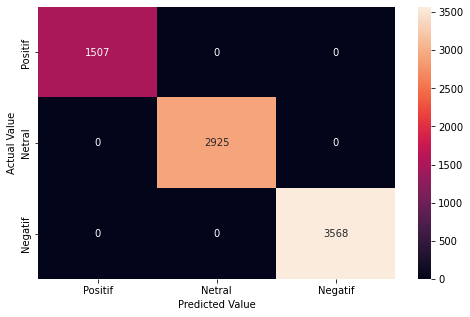

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
ax.xaxis.set_ticklabels(['Positif', 'Netral', 'Negatif'])
ax.yaxis.set_ticklabels(['Positif', 'Netral', 'Negatif'])
plt.show()


In [ ]:
results = {}

In [ ]:
TP1 = true_pos = 1507
TN1 = true_neg = 6493
FP1 = false_pos = 0
FN1 = false_neg = 0

## Confusion Matrix dari data Training

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix: \n',conf_mat)

Confusion Matrix: 
 [[ 6397     0     0]
 [    0 11576     0]
 [    0     0 14027]]


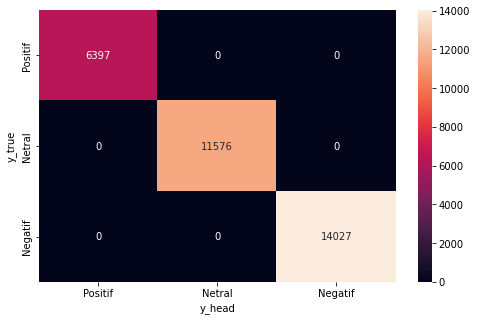

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
ax.xaxis.set_ticklabels(['Positif', 'Netral', 'Negatif'])
ax.yaxis.set_ticklabels(['Positif', 'Netral', 'Negatif'])
plt.show()


In [ ]:
TP2 = true_pos = 6397
TN2 = true_neg = 256033
FP2 = false_pos = 0
FN2 = false_neg = 0

## Accuracy
Jumlah contoh yang diprediksi dengan benar / jumlah total contoh  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

**Perhitungan dengan Result**

In [ ]:
metric = "ACC of Testing data"
results[metric] = (TP1 + TN1) / (TP1 + TN1 + FP1 + FN1)
print(f"{metric} is {results[metric]: .3f}")

print("")

metric = "ACC of Training data"
results[metric] = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)
print(f"{metric} is {results[metric]: .3f}")

ACC of Testing data is  1.000

ACC of Training data is  1.000


**Perhitungan dengan Library Matrics fungsi `accuracy_score`** 

In [ ]:
#  menghitung set accuracy
print("Menghitung akurasi Data testing")
acc_dtest = accuracy_score(y_test, y_pred_test)
print("Test set accuracy: {:.2f}".format(acc_dtest))
print(f"Test set accuracy: {acc_dtest}")

print("")

print("Menghitung akurasi Data training")
acc_dtrain = accuracy_score(y_train, y_pred_train)
print("Train set accuracy: {:.2f}".format(acc_dtrain))
print(f"Train set accuracy: {acc_dtrain}")

Menghitung akurasi Data testing
Test set accuracy: 1.00
Test set accuracy: 1.0

Menghitung akurasi Data training
Train set accuracy: 1.00
Train set accuracy: 1.0


## Positive Predictive Value (Precision)
jumlah sampel sebenarnya dan diprediksi sebagai `Positive` / jumlah total sampel diprediksi sebagai `Positive`  
Also called **Precision**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)


**Perhitungan dengan Result**

In [ ]:
metric = "PPV of Testing data"
results[metric] = TP1 / (TP1 + FP1)
print(f"{metric} is {results[metric]: .3f}")

print("")

metric = "PPV of Training data"
results[metric] = TP2 / (TP2 + FP2)
print(f"{metric} is {results[metric]: .3f}")

PPV of Testing data is  1.000

PPV of Training data is  1.000


**Perhitungan dengan Library Matrics fungsi `precision_score`** 

In [ ]:
#  menghitung set Precision
print("Menghitung Precision Data testing")
pcs_dtest = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
print("Test set Precision: {:.2f}".format(pcs_dtest))
print(f"Test set Precision: {pcs_dtest}")

print("")

print("Menghitung Precision Data training")
pcs_dtrain = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
print("Train set Precision: {:.2f}".format(pcs_dtrain))
print(f"Train set Precision: {pcs_dtrain}")

Menghitung Precision Data testing
Test set Precision: 1.00
Test set Precision: 1.0

Menghitung Precision Data training
Train set Precision: 1.00
Train set Precision: 1.0


## True Positive Rate (Recall)
jumlah sampel sebenarnya dan diprediksi sebagai `Positive` / jumlah sampel sebenarnya `Positive`  
juga disebut sebagai **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)


**Perhitungan dengan Result**

In [ ]:
metric = "TPR of Testing Data"
results[metric] = TP1 / (TP1 + FN1)
print(f"{metric} is {results[metric]: .3f}")

print("")

metric = "TPR of Training Data"
results[metric] = TP2 / (TP2 + FN2)
print(f"{metric} is {results[metric]: .3f}")

TPR of Testing Data is  1.000

TPR of Training Data is  1.000


**Perhitungan dengan Library Matrics fungsi `recall_score`** 

In [ ]:
#  menghitung set Recall
print("Menghitung Recall Data testing")
pcs_dtest = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
print("Test set Recall: {:.2f}".format(pcs_dtest))
print(f"Test set Recall: {pcs_dtest}")

print("")

print("Menghitung Recall Data training")
pcs_dtrain = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
print("Train set Recall: {:.2f}".format(pcs_dtrain))
print(f"Train set Recall: {pcs_dtrain}")

Menghitung Recall Data testing
Test set Recall: 1.00
Test set Recall: 1.0

Menghitung Recall Data training
Train set Recall: 1.00
Train set Recall: 1.0


## F1 score
Rata-rata Harmonic dari Precision dan Recall.  
![alt text](https://images.deepai.org/user-content/9954225913-thumb-4901.svg)

**Perhitungan dengan Result**

In [ ]:
metric = "F1 of Testing Data"
results[metric] = 2 / (1 / results["PPV of Testing data"] + 1 / results["TPR of Testing Data"])
print(f"{metric} is {results[metric]: .3f}")

print("")

metric = "F1 of Training Data"
results[metric] = 2 / (1 / results["PPV of Training data"] + 1 / results["TPR of Training Data"])
print(f"{metric} is {results[metric]: .3f}")

F1 of Testing Data is  1.000

F1 of Training Data is  1.000


**Perhitungan dengan Library Matrics fungsi `precision_score`** 

In [ ]:
#  menghitung set F1-Score
print("Menghitung F1-Score Data testing")
pcs_dtest = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
print("Test set F1-Score: {:.2f}".format(pcs_dtest))
print(f"Test set F1-Score: {pcs_dtest}")

print("")

print("Menghitung F1-Score Data training")
pcs_dtrain = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
print("Train set F1-Score: {:.2f}".format(pcs_dtrain))
print(f"Train set F1-Score: {pcs_dtrain}")

Menghitung F1-Score Data testing
Test set F1-Score: 1.00
Test set F1-Score: 1.0

Menghitung F1-Score Data training
Train set F1-Score: 1.00
Train set F1-Score: 1.0


## Precision, Recall, F1-Score, Support setiap kategori clustering 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test,
      target_names=['Positif', 'Netral', 'Negatif'], zero_division=0))

              precision    recall  f1-score   support

     Positif       1.00      1.00      1.00      1507
      Netral       1.00      1.00      1.00      2925
     Negatif       1.00      1.00      1.00      3568

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



## ROC curve (Receiver Operating Characteristic curve)
Kurva karakteristik operasi penerima, seperti **ROC curve**, adalah plot grafis yang menggambarkan kemampuan diagnostik sistem pengklasifikasi biner karena ambang batas diskriminasinya bervariasi.  
 ROC curve dibuat dengan memplot **True Positive Rate (TPR)** berlawanan **False Positive Rate (FPR)** dengan berbagai variasi setting pada threshold.    


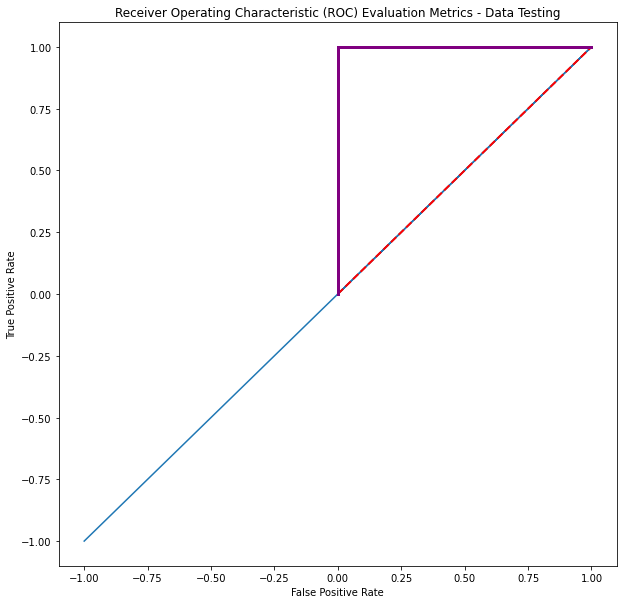

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC) Evaluation Metrics - Data Testing')
plt.plot(y_test, y_pred_test)
plt.plot([0, 1], ls="--", lw=2,color='red')
plt.plot([0, 0], [1, 0] , lw=3, color='purple'), plt.plot([1, 1] , lw=3, color='purple')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

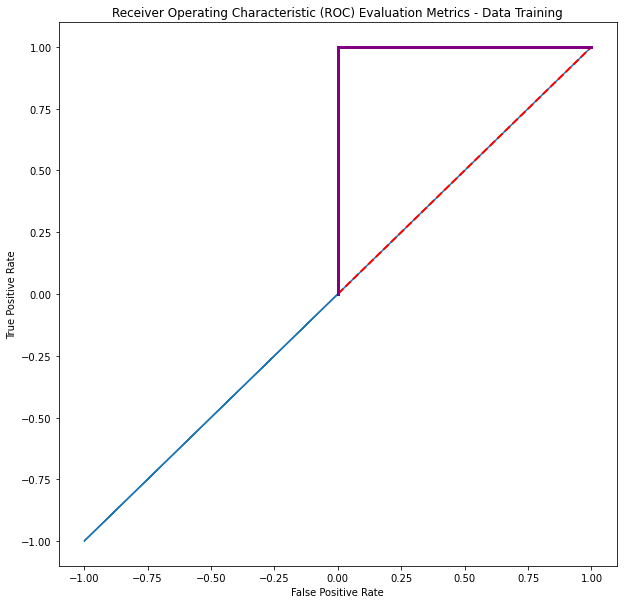

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC) Evaluation Metrics - Data Training')
plt.plot(y_train, y_pred_train)
plt.plot([0, 1], ls="--", lw=2,color='red')
plt.plot([0, 0], [1, 0] , lw=3, color='purple'), plt.plot([1, 1] , lw=3, color='purple')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()